/home/antonio/Installed/anaconda3/envs/gammapy-0.20/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:162: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


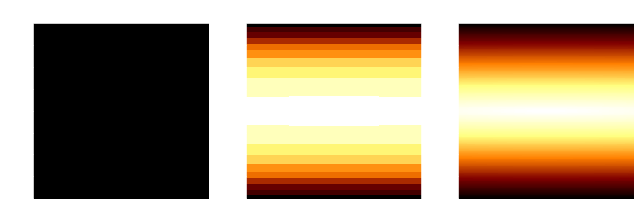

In [20]:
from astropy import units as u
import matplotlib.pyplot as plt
from gammapy.maps import Map, WcsGeom
from gammapy.modeling.models import (
    GeneralizedGaussianSpatialModel,
    Models,
    PowerLawSpectralModel,
    SkyModel,
)

lon_0 = 20
lat_0 = 0
reval = 2
dr = 0.02
geom = WcsGeom.create(
    skydir=(lon_0, lat_0),
    binsz=dr,
    width=(2 * reval, 2 * reval),
    frame="galactic",
)

eta_range = [0.1, .5, .9]
tags = [r"$\eta=$"+str(eta_range[0]), r"$\eta=$"+str(eta_range[1]), r"$\eta=$"+str(eta_range[2])]
r_0 = 1e9
e = .999
phi = 90 * u.deg
fig, axes = plt.subplots(1, 3, figsize=(9, 6))
for ax, eta, tag in zip(axes, eta_range, tags):
    model = GeneralizedGaussianSpatialModel(
        lon_0=lon_0 * u.deg,
        lat_0=lat_0 * u.deg,
        eta=eta,
        r_0=r_0 * u.deg,
        e=e,
        phi=phi,
        frame="galactic",
    )
    meval = model.evaluate_geom(geom)
    Map.from_geom(geom=geom, data=meval.value, unit=meval.unit).plot(ax=ax)
    pixreg = model.to_region().to_pixel(geom.wcs)
    pixreg.plot(ax=ax, edgecolor="g", facecolor="none", lw=2)
    ax.set_title(tag)
   
plt.tight_layout()

In [21]:
Map.from_geom(geom=geom, data=meval.value, unit=meval.unit).write("gaussian_hess.fits", overwrite=True)